<a href="https://colab.research.google.com/github/anamunoz01/AA_PRACTICA2_GRUPO_10/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 2**

GRUPO 10

Elena Gómez

Ana Muñoz

## **Objetivo**

El  objetivo  de  esta  práctica  es  diseñar,  configurar  y  entrenar  un  modelo  de  Redes  de Neuronas Convolucionales. 

Crearemos un modelo  de Red  de  Neuronas  Convolucionales  que  sea  capaz  de  reconocer  y clasificar imágenes  de  ropa  en  sus  diferentes  tipologías.  Este  modelo  será  definido, 
configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.  

Usaremos el conjunto de datos Fashion-MNIST, precargado en Keras.
Fashion-MNIST  es  un  conjunto  de  datos  de  las  imágenes  de  los  artículos  de  Zalando. El conjunto de datos contiene 70K imágenes en escala de grises en 10 categorías.  Estas  imágenes  muestran  prendas  individuales  de  ropa  en  baja  resolución (28 x 28 píxeles)

Se usan 60K imágenes para entrenar la red y 10K imágenes para evaluar la precisión con la que la red aprende a clasificar las imágenes

- Importamos tensorflow y comprobamos que la versión es 2.0.0 o superior 



In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)#

2.7.0


- **Datos Fashion-MNIST**

 A continuación, cargamos las imágenes y creamos un vector de 10 elementos en el que a cada posición se le asigna el nombre de cada prenda. ('class_names')


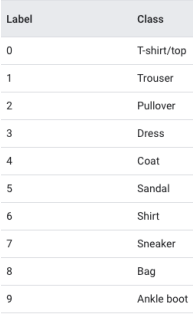

In [2]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Creamos vector con las prendas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


-  **Estudio de datos:**

 Como vimos en la primera práctica, sabemos que las imágenes tienen la siguiente forma:

 (60000, 28, 28)

 Del mismo modo, sabemos que las etiquetas son números enteros entre 0 y 9 que corresponden con la prenda de la imagen ya clasificada.


In [3]:
print(train_labels[5000])

4


## **Creamos los modelos**

- Importamos todo lo necesario para nuestros modelos

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

Vamos a crear 3 modelos diferentes de RNA,  los cuales van a ser definidos, configurados, entrenados, evaluados y mejorados para posteriormente usarlos para hacer predicciones.

Para todos los modelos, la red será secuencial y tendrá dos capas convolucionales y una o dos capas tipo Dense. Para cada modelo cambiaremos el optimizador, la función de activación, el número de neuronas por capa y el tamaño de la ventana de las capas convolucionales, mientras que el tamaño de la ventana de la capa pooling siempre será 2x2.


Cada una de las neuronas de la capa de entrada están conectadas con unos datos de tamaño 28x28x1, siendo el tamaño de la matriz 28x28 y 1 el canal de escala de grises. Solo lo definimos para la primera capa, para la segunda capa y posteriores, Keras lo deduce.


Para los tres modelos la última capa tendrá función de activación softmax y 10 neuronas. Esto se debe a que nos interesa sacar una distribución de probabilidad sobre las 10 clases de prendas que tenemos.

Para facilitar la definición de los tres modelos, creamos vectores con los valores que vamos a usar para la creación de las redes.

In [5]:
casos = 3
numero_neuronas_primera_capa_conv = [32, 64, 64]
numero_neuronas_segunda_capa_conv = [64, 128, 128]
tamaño_ventana_conv1 = [(5,5), (7,7), (7,7)]
tamaño_ventana_conv2 = [(5,5), (3,3), (3,3)]
ventana_capa_pooling1 = [(2,2), (2,2), (2,2)]
ventana_capa_pooling2 = [(2,2), (2,2), (2,2)]
numero_neuronas_primera_capa_dense = [10, 65, 65]
numero_neuronas_segunda_capa_dense = [0, 10, 10]
funcion_activacion_primera_capa_conv = ['relu','relu', 'relu']
funcion_activacion_segunda_capa_conv = ['relu','relu', 'relu']
funcion_activacion_primera_capa_dense = ['softmax','relu', 'relu']
funcion_activacion_segunda_capa_dense = ['', 'softmax', 'softmax']

optimizador =['sgd', 'sgd', 'adam']
funcion_perdida = ['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy','sparse_categorical_crossentropy']
numero_iteraciones = [5,5,5]
metrica = ['accuracy','accuracy','accuracy']
models = []

In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

for caso in range(casos):
  if (caso == 0):
    model = Sequential()
    model.add(Conv2D(numero_neuronas_primera_capa_conv[caso], tamaño_ventana_conv1[caso], activation = funcion_activacion_primera_capa_conv[caso], input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(ventana_capa_pooling1[caso]))
    model.add(Conv2D(numero_neuronas_segunda_capa_conv[caso], tamaño_ventana_conv2[caso], activation = funcion_activacion_segunda_capa_conv[caso]))
    model.add(MaxPooling2D(ventana_capa_pooling2[caso]))

    model.add(Flatten())
    model.add(Dense(numero_neuronas_primera_capa_dense[caso], activation=funcion_activacion_primera_capa_dense[caso]))
    models.append(model)
  
  else:
    model = Sequential()
    model.add(Conv2D(numero_neuronas_primera_capa_conv[caso], tamaño_ventana_conv1[caso], padding = 'same', activation = funcion_activacion_primera_capa_conv[caso], input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(ventana_capa_pooling1[caso]))
    model.add(Conv2D(numero_neuronas_segunda_capa_conv[caso], tamaño_ventana_conv2[caso], padding = 'same', activation = funcion_activacion_segunda_capa_conv[caso]))
    model.add(MaxPooling2D(ventana_capa_pooling2[caso]))

    model.add(Flatten())
    model.add(Dense(numero_neuronas_primera_capa_dense[caso], activation=funcion_activacion_primera_capa_dense[caso]))
    model.add(Dense(numero_neuronas_segunda_capa_dense[caso], activation=funcion_activacion_segunda_capa_dense[caso]))
    models.append(model)




In [7]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  models[caso].summary()
  print("\n\n")

CASO  1
---------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)

- **Explicación Summary caso 1**

 - En la primera capa convolucional obtenemos 832 parámetros que son el resultado de : ((5 x 5) + 1) x 32, siendo 5 el tamaño de la ventana, 32 los filtros que aplicamos y 1 el umbral. En esta capa, convertimos una matriz inicial de 28x28 en 32 matrices nuevas 24x24

   Con esto, realizamos el maxpooling con una ventana 2x2 obteniendo 32 matrices de 12x12 que serán los datos de entrada de la segunda capa.

   Al aplicar la convolución, cada una de las 32 matrices que hemos obtenido anteriormente, se convierte en 64 nuevas matrices 8x8.
 
 - En la segunda capa convolucional obtenemos 51264 parámetros que son el resultado de : ((5 x 5 x 32) + 1) x 64, siendo 64 los nuevos filtros que aplicamos a lo anterior. 
 
   Con esto, realizamos el maxpooling con una ventana 2x2 obteniendo 64 matrices de 4x4 que serán los datos de entrada de la última capa.

  - Antes de la última capa, añadimos una capa Flatten para ajustar los tensores a la entrada de la capa densa, es decir, aplanamos los datos pasando de un tensor 3D a uno 1D

   La salida (4, 4, 64) se debe pasar a un vector (4 x 4 x 64) = 1024.

   Con esto, en la última capa tenemos 10250 parámetros que es el resultado de: 1024 x 10 + 10.

- **Explicación Summary caso 2**

 - En la primera capa convolucional obtenemos 3200 parámetros que son el resultado de : ((7 x 7) + 1) x 64, siendo 7 el tamaño de la ventana, 64 los filtros que aplicamos y 1 el umbral. 

   Obtenemos 64 matrices del mismo tamaño que las matrices de entrada al haberle añadido padding, es decir, no se reduce su tamaño inicial.

   Con esto, realizamos el maxpooling con una ventana 2x2 obteniendo 64 matrices de 14x14 que serán los datos de entrada de la segunda capa.

  - En la segunda capa convolucional, obtenemos 73856 parámetros que son el resultado de : ((3 x 3) x 64 + 1) x 128, siendo 3 el tamaño de la ventana, 64 los filtros anteriores, 128 los filtros nuevos que aplicamos y 1 el umbral. 

   Por cada una de las 64 matrices que entran, obtenemos 128 matrices del mismo tamaño que las matrices de entrada al haberle añadido padding, es decir, 14x14.

   Con esto, realizamos el maxpooling con una ventana 2x2 obteniendo 128 matrices de 7x7 que serán los datos de entrada de la siguiente capa.

  - Antes de las últimas capas, añadimos una capa Flatten para ajustar los tensores a la entrada de las capas densas.

   La salida (7, 7, 6128) se debe pasar a un vector (7 x 7 x 128) = 6272.

  - Con esto, en la primera capa densa tenemos 407745 parámetros que es el resultado de: 6272 x 65 + 65. Donde 65 es el número de neuronas de la capa.

   En la capa de salida, obtenemos 660 parámetros que son el resultado de: 10 x 65 + 10. Siendo 10 el número de neuronas de la última capa que corresponde con el número de clases que tenemos.

- **Explicación summary caso 3**

 Como vemos, el tercer modelo es análogo al segundo, obtenemos los mismos parámetros. Lo único que cambia es el optimizador, que veremos más adelante.

## **Tansformación de datos**

Antes de entrenar nuestros modelos, preprocesaremos nuestros datos dándoles la forma que espera la red y escalando para que todos los valores estén en el intervalo [0, 1]. Pasando de una matriz de forma (60000, 28, 28) con valores en el intervalo [0, 255] a una matriz de forma float32 con forma (60000, 28, 28, 1) con valores entre 0 y 1

In [8]:
print (train_images.shape)
print (train_labels.shape)

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

print (train_images.shape)
print (train_labels.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28, 1)
(60000,)


Como vamos a usar para la función de pérdida `sparse_categorical_crossentropy`, no hace falta modificar las etiquetas, ya que permite la entrada de enteros.

## **Compilamos los modelos**


* Para el algoritmo optimizador utilizamos '**adam**' , o '**sgd**' (Stocastic Gradient Descendent), dependiendo del modelo.

* Para la función de perdida elegimos **sparse_categorical_crossentropy** que se utiliza como señal de retroalimentación para aprender los tensores de peso y que la fase de entrenamiento intentará minimizar.

* Para la precisión utilizaremos **accuracy**: Solo tendremos en cuenta la fracción de imágenes que son correctamente clasificadas.

In [9]:
for caso in range(casos):
  models[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=[metrica[caso]])

Para los modelos 1 y 2 utilizamos el optimizador **sgd** , descenso del gradiente estocástico. En cambio, para el modelo 3 utilizamos **adam** (Adaptive moment estimation).

El algoritmo de Adam es diferente del sgd. El sgd mantiene una tasa de aprendizaje única (alfa) para actualizar todos los pesos, y la tasa de aprendizaje no cambia durante el proceso de entrenamiento, Mientras que Adam calcula una tasa de aprendizaje diferente para cada peso.

El algoritmo de Adam obtiene las ventajas de los algoritmos AdaGrad y RMSProp. Adam no solo calcula la tasa de aprendizaje de parámetros adaptativos en función del valor medio del primer momento como el algoritmo RMSProp, sino que también hace un uso completo del valor medio del segundo momento del gradiente (es decir, la varianza no centrada). 




## **Entrenamos y probamos los modelos**

- Utilizamos la función `fit` que devuelve los valores de pérdida y de precisión de la red para las imágenes de entrenamiento.

- Para evaluar los modelos con los datos de prueba utilizamos `evaluate` que devuelve el valor de pérdida y la precisión del modelo.

In [10]:
for caso in range(casos):
  if caso == 0:
   print("CASO ",caso + 1)
   print("---------------------------------")
   print("NÚMERO NEURONAS PRIMERA CAPA CONVOLUCIONAL: ",numero_neuronas_primera_capa_conv[caso])
   print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA CONVOLUCIONAL: ",funcion_activacion_primera_capa_conv[caso])
   print("NÚMERO NEURONAS SEGUNDA CAPA CONVOLUCIONAL: ",numero_neuronas_segunda_capa_conv[caso])
   print("FUNCIÓN ACTIVACIÓN SEGUNDA CAPA CONVOLUCIONAL: ",funcion_activacion_segunda_capa_conv[caso])
   print("NÚMERO NEURONAS ÚLTIMA CAPA: ",numero_neuronas_primera_capa_dense[caso])
   print("FUNCIÓN ACTIVACIÓN ÚLTIMA CAPA : ",funcion_activacion_primera_capa_dense[caso])
   print("OPTIMIZADOR: ",optimizador[caso])
   print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
   print("MÉTRICA: ",metrica[caso])
   print("---------------------------------")
   models[caso].fit(train_images, train_labels, epochs=numero_iteraciones[caso])
   print("\n\n")

  else:
   print("CASO ",caso + 1)
   print("---------------------------------")
   print("NÚMERO NEURONAS PRIMERA CAPA CONVOLUCIONAL: ",numero_neuronas_primera_capa_conv[caso])
   print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA CONVOLUCIONAL: ",funcion_activacion_primera_capa_conv[caso])
   print("NÚMERO NEURONAS SEGUNDA CAPA CONVOLUCIONAL: ",numero_neuronas_segunda_capa_conv[caso])
   print("FUNCIÓN ACTIVACIÓN SEGUNDA CAPA CONVOLUCIONAL: ",funcion_activacion_segunda_capa_conv[caso])
   print("NÚMERO NEURONAS PRIMERA CAPA DENSA: ",numero_neuronas_primera_capa_dense[caso])
   print("FUNCIÓN ACTIVACIÓN PRIMERA CAPA DENSA : ",funcion_activacion_primera_capa_dense[caso])
   print("NÚMERO NEURONAS ÚLTIMA CAPA: ",numero_neuronas_segunda_capa_dense[caso])
   print("FUNCIÓN ACTIVACIÓN ÚLTIMA CAPA : ",funcion_activacion_segunda_capa_dense[caso])
   print("OPTIMIZADOR: ",optimizador[caso])
   print("FUNCIÓN PÉRDIDA: ",funcion_perdida[caso])
   print("MÉTRICA: ",metrica[caso])
   print("---------------------------------")
   models[caso].fit(train_images, train_labels, epochs=numero_iteraciones[caso])
   print("\n\n")

CASO  1
---------------------------------
NÚMERO NEURONAS PRIMERA CAPA CONVOLUCIONAL:  32
FUNCIÓN ACTIVACIÓN PRIMERA CAPA CONVOLUCIONAL:  relu
NÚMERO NEURONAS SEGUNDA CAPA CONVOLUCIONAL:  64
FUNCIÓN ACTIVACIÓN SEGUNDA CAPA CONVOLUCIONAL:  relu
NÚMERO NEURONAS ÚLTIMA CAPA:  10
FUNCIÓN ACTIVACIÓN ÚLTIMA CAPA :  softmax
OPTIMIZADOR:  sgd
FUNCIÓN PÉRDIDA:  sparse_categorical_crossentropy
MÉTRICA:  accuracy
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 19s 5ms/step - loss: 0.8156 - accuracy: 0.7118
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5094 - accuracy: 0.8169
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4458 - accuracy: 0.8414
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4117 - accuracy: 0.8547
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3893 - accuracy: 0.8617



CASO  2
---------------------------------
NÚMER

Podemos observar cómo entre el modelo 1 y el modelo 2 no hay gran diferencia, ya que conseguimos valores muy parecidos tanto para la pérdida como para la precisión.

Sin embargo, el modelo 3 destaca por tener mejores valores que los anteriores, ya que tiene una pérdida que es la mitad que los modelos 1 y 2 , y una precisión mayor. Esto se debe a que el modelo, a diferencia de los otros, utiliza el optimizador adam.

In [12]:
prueba = []
for caso in range(casos):
  prueba.append(models[caso].evaluate(test_images,  test_labels))


313/313 [==============================] - 2s 5ms/step - loss: 0.2560 - accuracy: 0.9119


Nos damos cuenta, que 5 épocas son suficientes para conseguir una precisión bastante buena, es decir, el modelo aprende a generalizar ya que nos da una pérdida y una precisión muy similar entre los datos de test y de entrenamiento

## **25 épocas**

Analizar e interpretar los resultados del caso 1 frente a su original si se 
multiplica por 5 las épocas de entrenamiento (25)


In [14]:
model11 = Sequential()
model11.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model11.add(MaxPooling2D((2, 2)))

model11.add(Conv2D(64, (5, 5), activation='relu'))
model11.add(MaxPooling2D((2, 2)))

model11.add(Flatten())
model11.add(Dense(10, activation='softmax'))


In [15]:
model11.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model11.fit(train_images, train_labels, epochs=25, batch_size=100)

test_loss11, test_acc11 = model11.evaluate(test_images, test_labels)

print('Test loss:', test_loss11)
print('Test accuracy:', test_acc11)

Epoch 1/25
600/600 [==============================] - 5s 7ms/step - loss: 1.2013 - accuracy: 0.5901
Epoch 2/25
600/600 [==============================] - 4s 7ms/step - loss: 0.6796 - accuracy: 0.7497
Epoch 3/25
600/600 [==============================] - 4s 7ms/step - loss: 0.5926 - accuracy: 0.7832
Epoch 4/25
600/600 [==============================] - 4s 7ms/step - loss: 0.5440 - accuracy: 0.8024
Epoch 5/25
600/600 [==============================] - 4s 7ms/step - loss: 0.5089 - accuracy: 0.8164
Epoch 6/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4789 - accuracy: 0.8298
Epoch 7/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4586 - accuracy: 0.8377
Epoch 8/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4408 - accuracy: 0.8446
Epoch 9/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4273 - accuracy: 0.8483
Epoch 10/25
600/600 [==============================] - 4s 7ms/step - loss: 0.4154 - accuracy: 0.8541

Comparando este modelo con el modelo 1, nos damos cuenta que, aunque tanto la precisión como el valor de pérdida mejoran, se acercan bastante a los valores del modelo 1, por tanto, creemo que multiplicar las épocas por 5 no es eficiente.

También, vemos que a pesar de haber hecho 25 iteraciones, el modelo no se sobreentrena, aunque no mejora considerablemente como para que merezca la pena el tiempo añadido de ejecución.

## **Función de activanción tanh**

Analizar el resultado del caso 1 si en lugar de ReLU se usa tanh en la función de 
activación de las dos capas convolucionales.


In [16]:
model12 = Sequential()
model12.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
model12.add(MaxPooling2D((2, 2)))

model12.add(Conv2D(64, (5, 5), activation='tanh'))
model12.add(MaxPooling2D((2, 2)))

model12.add(Flatten())
model12.add(Dense(10, activation='softmax'))

In [17]:
model12.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model12.fit(train_images, train_labels, epochs=5, batch_size=100)

test_loss12, test_acc12 = model12.evaluate(test_images, test_labels)

print('Test loss:', test_loss12)
print('Test accuracy:', test_acc12)

Epoch 1/5
600/600 [==============================] - 5s 7ms/step - loss: 1.1593 - accuracy: 0.6329
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.6622 - accuracy: 0.7582
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5755 - accuracy: 0.7911
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5256 - accuracy: 0.8109
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.5032 - accuracy: 0.8184
Test loss: 0.5031539797782898
Test accuracy: 0.8184000253677368


Observamos que hay una diferencia en torno a 0.05 en la precisión y de 0.1 respecto a la pérdida con el modelo 1 en el que la función de activación es Relu. 

Viendo que la función tanh se representa de este modo:

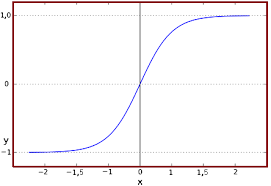

y la función Relu se representa así:

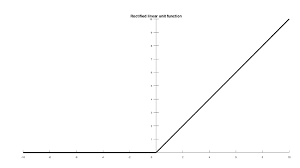


Llegamos a la conclusión de que la función de activación relu es mejor, ya que los datos cuyo valor es menor que el umbral los pone a 0, en cambio, la tangente hiperbóilica aunque aplana los valores, los sigue teniendo en cuenta, por lo que nos da un peor resultado tanto para la pérdida como para la precisión.

## **Predicciones**

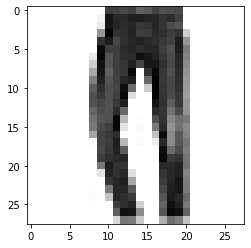

In [18]:
# Vemos el elemento 6 de test y pintémoslo con matplotlib
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [19]:
#Como hemos vuelto a añadir los datos para ver la imagen, tenemos que transformalos
#otra vez, para hacer las predicciones.
train_images = train_images.reshape((60000, 28,28,1))
test_images = test_images.reshape((10000, 28,28,1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255


Hacemos predicciones sobre la 6º imagen de test en cada modelo utilizando `predcit`

In [20]:
predictions = []
for caso in range(casos):
  predictions.append(models[caso].predict(test_images))

In [21]:
for caso in range(casos):
  print("----------------------------------------------------------")
  print("PREDICCIONES CASO ", caso + 1 , " : ", predictions[caso][5])
  print("VALOR MÁXIMO: ", np.argmax(predictions[caso][5]))
  print("\n\n")

----------------------------------------------------------
PREDICCIONES CASO  1  :  [6.5496681e-07 9.9989176e-01 1.1879675e-07 8.3934822e-07 9.8805220e-05
 7.9704012e-09 1.7726350e-06 1.6920172e-11 6.0923785e-06 1.3395262e-13]
VALOR MÁXIMO:  1



----------------------------------------------------------
PREDICCIONES CASO  2  :  [5.5692944e-06 9.9944276e-01 2.9756570e-06 5.9370064e-05 4.7504480e-04
 8.7624681e-09 1.4060252e-05 5.9730345e-09 2.4243155e-07 2.4715110e-09]
VALOR MÁXIMO:  1



----------------------------------------------------------
PREDICCIONES CASO  3  :  [2.1988344e-08 1.0000000e+00 1.7902678e-11 4.7353077e-10 8.7482761e-13
 2.2546248e-13 1.2119728e-11 7.7573746e-17 2.0715920e-11 2.1177511e-15]
VALOR MÁXIMO:  1





Podemos observar cómo los 3 modelos predicen correctamente que la imagen 6 de test corresponde con el elemento 1 de nuestro vector de prendas, es decir, unos pantalones

Ahora vamos a graficar las predicciones de la imagen 6 en cada modelo

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

----------------------------------------------------------
PREDICCIÓN CASO  1  : 





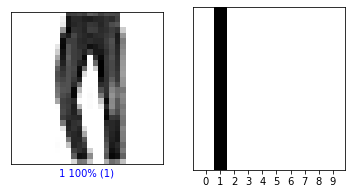

----------------------------------------------------------
PREDICCIÓN CASO  2  : 





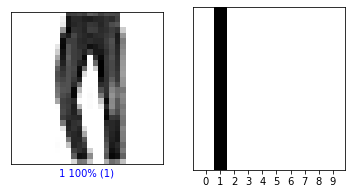

----------------------------------------------------------
PREDICCIÓN CASO  3  : 





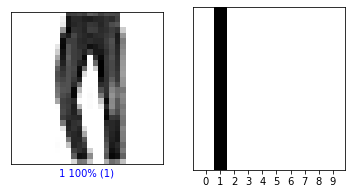

In [26]:
i = 5
for caso in range(casos):
  print("----------------------------------------------------------")
  print("PREDICCIÓN CASO ", caso + 1 , " : ")
  print("\n\n")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions[caso][i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[caso][i],  test_labels)
  plt.show()

Para la imagen 6 de los datos de prueba, los tres modelos la predicen con un 100% de seguridad. Tienen una precisión del 100% para ese caso.

Vemos la predicción, igual que el gráfico anterior, de las 14 primeras imágenes del conjunto de test, para cada uno de los casos.

----------------------------------------------------------
PREDICCIONES CASO  1  : 





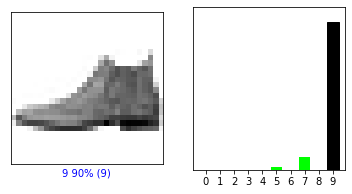

<Figure size 432x288 with 0 Axes>

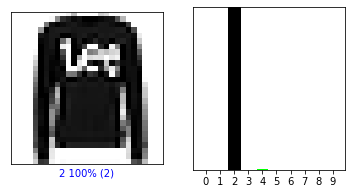

<Figure size 432x288 with 0 Axes>

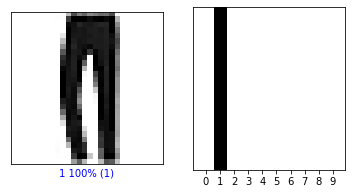

<Figure size 432x288 with 0 Axes>

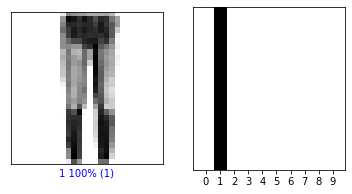

<Figure size 432x288 with 0 Axes>

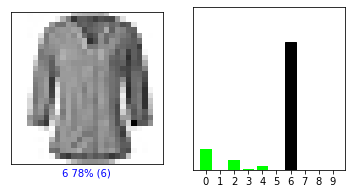

<Figure size 432x288 with 0 Axes>

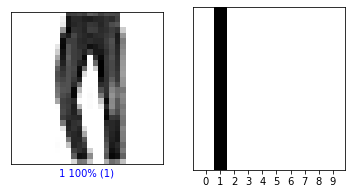

<Figure size 432x288 with 0 Axes>

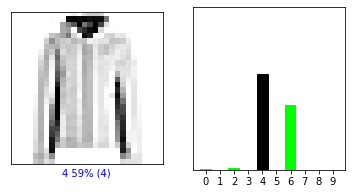

<Figure size 432x288 with 0 Axes>

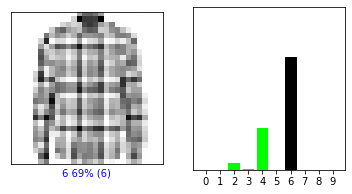

<Figure size 432x288 with 0 Axes>

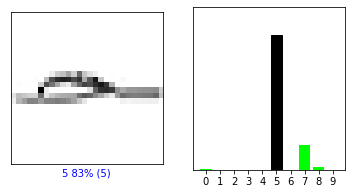

<Figure size 432x288 with 0 Axes>

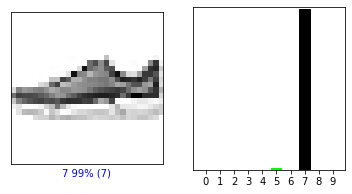

<Figure size 432x288 with 0 Axes>

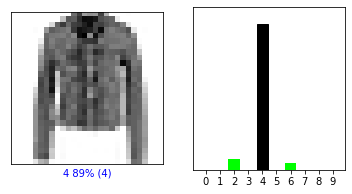

<Figure size 432x288 with 0 Axes>

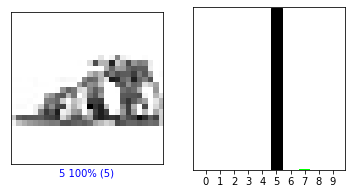

<Figure size 432x288 with 0 Axes>

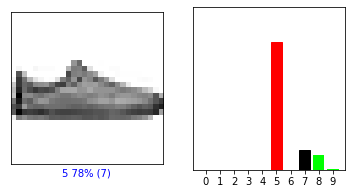

<Figure size 432x288 with 0 Axes>

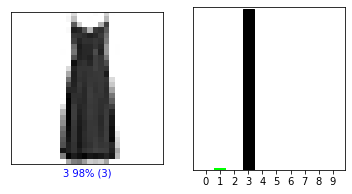

----------------------------------------------------------
PREDICCIONES CASO  2  : 





<Figure size 432x288 with 0 Axes>

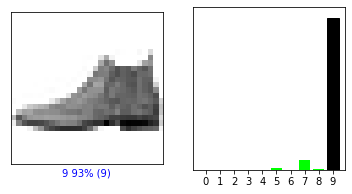

<Figure size 432x288 with 0 Axes>

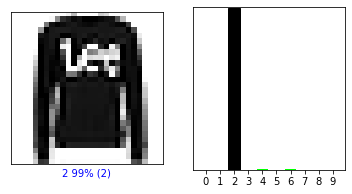

<Figure size 432x288 with 0 Axes>

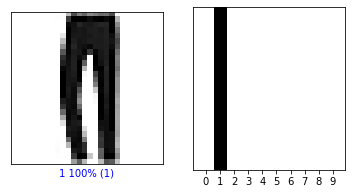

<Figure size 432x288 with 0 Axes>

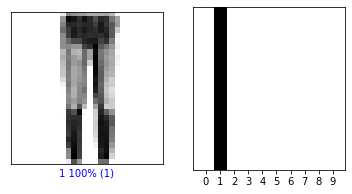

<Figure size 432x288 with 0 Axes>

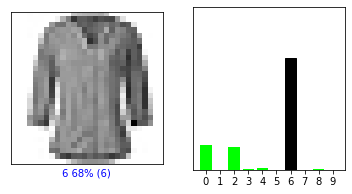

<Figure size 432x288 with 0 Axes>

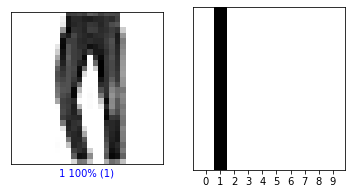

<Figure size 432x288 with 0 Axes>

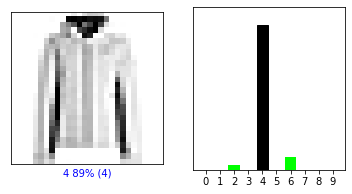

<Figure size 432x288 with 0 Axes>

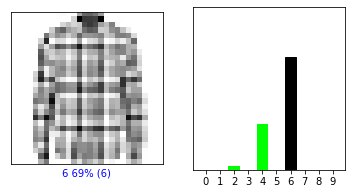

<Figure size 432x288 with 0 Axes>

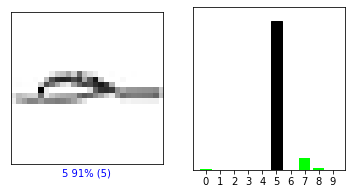

<Figure size 432x288 with 0 Axes>

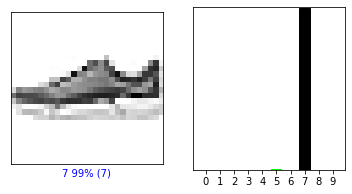

<Figure size 432x288 with 0 Axes>

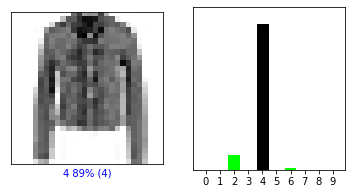

<Figure size 432x288 with 0 Axes>

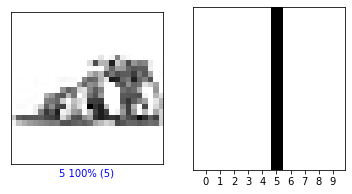

<Figure size 432x288 with 0 Axes>

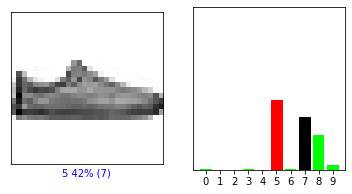

<Figure size 432x288 with 0 Axes>

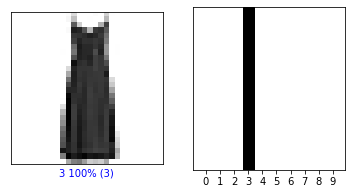

----------------------------------------------------------
PREDICCIONES CASO  3  : 





<Figure size 432x288 with 0 Axes>

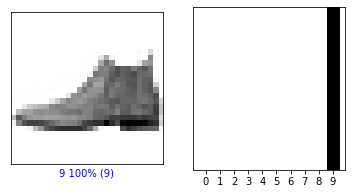

<Figure size 432x288 with 0 Axes>

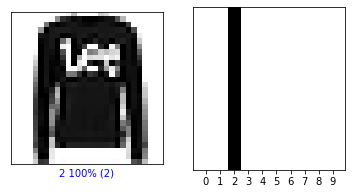

<Figure size 432x288 with 0 Axes>

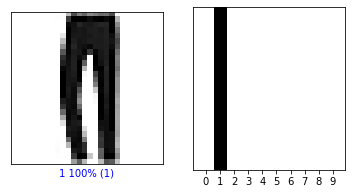

<Figure size 432x288 with 0 Axes>

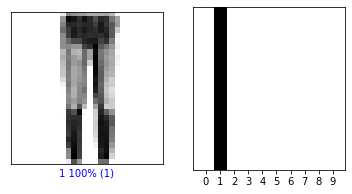

<Figure size 432x288 with 0 Axes>

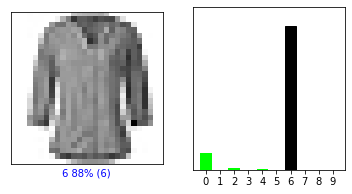

<Figure size 432x288 with 0 Axes>

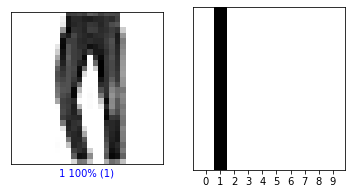

<Figure size 432x288 with 0 Axes>

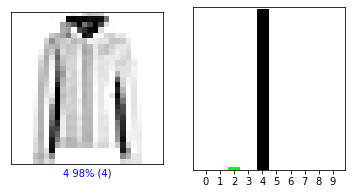

<Figure size 432x288 with 0 Axes>

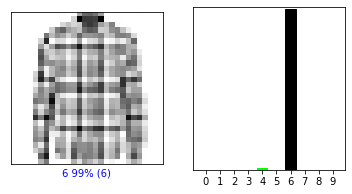

<Figure size 432x288 with 0 Axes>

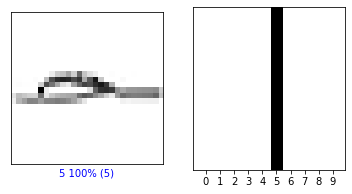

<Figure size 432x288 with 0 Axes>

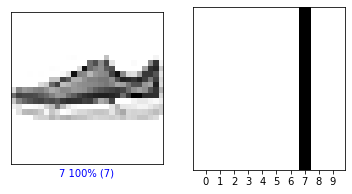

<Figure size 432x288 with 0 Axes>

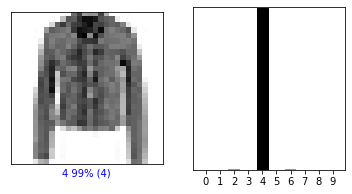

<Figure size 432x288 with 0 Axes>

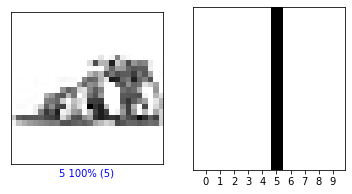

<Figure size 432x288 with 0 Axes>

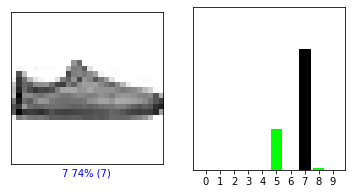

<Figure size 432x288 with 0 Axes>

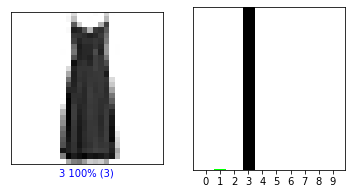

<Figure size 432x288 with 0 Axes>

In [27]:
for caso in range (casos):
    print("----------------------------------------------------------")
    print("PREDICCIONES CASO ", caso + 1 , " : ")
    print("\n\n")
    for i in range(14):
      plt.figure(figsize=(6,3))
      plt.subplot(1,2,1)
      plot_image(i, predictions[caso][i], test_labels, test_images.reshape(10000,28,28))
      plt.subplot(1,2,2)
      plot_value_array(i, predictions[caso][i],  test_labels)
      plt.show()
      plt.clf()

Observamos que los dos primeros modelos confunden la penúltima imagen, es decir, las zapatillas, no saben clasificarla correctamente.

Creemos que esto se debe a :
- No tener en los datos de entrenamiento suficientes imágenes que correspondan con la etiqueta asociada a zapatilla (7)

- La imagen tiene un "formato" diferente a todas las demás, es decir, está girada


Por otro lado, no nos sorprende que el modelo 3 prediga correctamente todas las imágenes, ya que como hemos visto anterioramente, al tener optimizador adam tiene una mejor precisión por lo que, en consecuencia, ofrece mejores resultados.


## **DROPOUT**

Dropout es una de las técnicas de regularización más efectivas 

Aplicar dropout a una capa consiste en retirar (poner a cero) 
aleatoriamente un número de características de salida de la 
capa durante el entrenamiento.

La “tasa de dropout” es la proporción de características que se 
ponen a 0 (entre 0.2 a 0.5)

Durante la prueba, no se retira ninguna característica. En su lugar, 
los valores de salida de la capa se reducen en un factor que es la “tasa de dropout” (para equilibrar que haya más neuronas activas que en el entrenamiento).

Añadimos dropout, en un modelo como el Modelo 1, en cada capa con una tasa igual a 0.5

In [28]:
from keras import layers
from keras import models
modelD = Sequential()
modelD.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelD.add(layers.Dropout(0.5))
modelD.add(MaxPooling2D((2, 2)))

modelD.add(Conv2D(64, (5, 5), activation='relu'))
modelD.add(layers.Dropout(0.5))
modelD.add(MaxPooling2D((2, 2)))

modelD.add(Flatten())
modelD.add(layers.Dropout(0.5))
modelD.add(Dense(10, activation='softmax'))
modelD.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                 

In [29]:
modelD.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

modelD.fit(train_images, train_labels, epochs=5, batch_size=100)

test_lossD, test_accD = modelD.evaluate(test_images, test_labels)

print('Test loss:', test_lossD)
print('Test accuracy:', test_accD)

Epoch 1/5
600/600 [==============================] - 5s 8ms/step - loss: 1.0609 - accuracy: 0.6163
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: 0.6928 - accuracy: 0.7404
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.6247 - accuracy: 0.7679
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.5812 - accuracy: 0.7861
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.7951 - accuracy: 0.8273
Test loss: 0.7951036095619202
Test accuracy: 0.8273000121116638


En este modelo, observamos como para los datos de prueba, la precisión se mantiene prácticamente igual que en el modelo 1, mientras que el valor de pérdida es bastante más alto. 

Si nos fijamos en el entrenamiento, vemos que tanto el valor de périda como la precisión son peores que en el modelo 1, lo cual es lógico, ya que al añadirle dropout estamos modificando los valores continuamente.

En conclusión, como buscamos una precisión lo más alta posible,  utilizar dropout no nos interesa.

## **BatchNormalization**

Capa que normaliza sus entradas.

La normalización por lotes realiza una transformación que mantiene la media cerca de 0 y la desviación estándar de salida cerca de 1.

Durante el entrenamiento, la capa normaliza su salida utilizando la media y la desviación estándar del lote actual de entradas.

Durante la prueba, la capa normaliza su salida utilizando una media móvil de la media y la desviación estándar de los lotes que ha visto durante el entrenamiento,

Añadimos BatchNormalization, en un modelo como el Modelo 1, en cada capa


In [30]:
from keras import layers
from keras import models
from tensorflow.keras.layers import BatchNormalization
modelB = Sequential()
modelB.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
modelB.add(BatchNormalization())
modelB.add(MaxPooling2D((2, 2)))

modelB.add(Conv2D(64, (5, 5), activation='relu'))
modelB.add(BatchNormalization())
modelB.add(MaxPooling2D((2, 2)))

modelB.add(Flatten())
modelB.add(BatchNormalization())
modelB.add(Dense(10, activation='softmax'))
modelB.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 batch_normalization_1 (Batc  (None, 8, 8, 64)         256       
 hNormalization)                                                 
                                                      

In [31]:
modelB.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

modelB.fit(train_images, train_labels, epochs=5, batch_size=100)

test_lossB, test_accB = modelB.evaluate(test_images, test_labels)

print('Test loss:', test_lossB)
print('Test accuracy:', test_accB)

Epoch 1/5
600/600 [==============================] - 6s 9ms/step - loss: 0.4762 - accuracy: 0.8316
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.3337 - accuracy: 0.8812
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2951 - accuracy: 0.8954
Epoch 4/5
600/600 [==============================] - 5s 8ms/step - loss: 0.2700 - accuracy: 0.9029
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.3188 - accuracy: 0.8860
Test loss: 0.3188439607620239
Test accuracy: 0.8859999775886536


Comprobamos como al utilizar **batchnormalization**, obtenemos una precisión más alta que la del modelo 1 y un valor de pérdida más pequeño, por tanto, nuestro modelo es mejor.

## **Callbacks API**
Una "callback" o devolución de llamada es un objeto que puede realizar acciones en varias etapas del entrenamiento (por ejemplo, al comienzo o al final de una época, antes o después de un solo lote, etc.).

Puede usar devoluciones de llamada para:

 

*   Escribir registros de TensorBoard después de cada lote de entrenamiento     para monitorear sus métricas
*   Guarde periódicamente el modelo en el disco
*   Hacer paradas tempranas
*   Obtener una vista de los estados internos y las estadísticas de un modelo durante el entrenamiento
*   etc


*   **Creamos un modelo implementando callback**
 
 Utilizamos callback para entrenar un modelo igual al Modelo 2

In [33]:
modelnuevo = Sequential()
modelnuevo.add(Conv2D(64, (7, 7), padding='same', activation='relu', input_shape=(28, 28, 1)))
modelnuevo.add(MaxPooling2D((2, 2)))

modelnuevo.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
modelnuevo.add(MaxPooling2D((2, 2)))

modelnuevo.add(Flatten())
modelnuevo.add(Dense(65, activation='relu'))
modelnuevo.add(Dense(10, activation='softmax'))
modelnuevo.summary()


modelnuevo.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
def scheduler(epoch, lr):
    if epoch < 1:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


modelnuevo.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          callbacks=[callback])

test_loss, test_acc = modelnuevo.evaluate(test_images, test_labels)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 6272)              0         
                                                                 
 dense_11 (Dense)            (None, 65)               

Usamos el callback de **LearningRateScheduler**

Al comienzo de cada época, esta devolución de llamada obtiene el valor de tasa de aprendizaje actualizado de la función scheduler, con la época actual y la tasa de aprendizaje actual, y aplica la tasa de aprendizaje actualizada en el optimizador.

Esto quiere decir que va variando el learning rate, en nuestro caso, disminuye 0,1 en cada época.

Aún variando la tasa de aprendizaje en cada iteración, vemos que el resultado no mejora, de hecho empeora.

Deducimos que esto se debe a que hay muy pocas épocas, por lo tanto, al reducirle el learning rate en cada iteración, no se acerca tanto al mínimo y se queda más alejado.

##**Matriz confusión**

In [37]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [48]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
from keras.utils.np_utils import to_categorical
test_labels = to_categorical(test_labels)

In [47]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0

In [49]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

models = []

for caso in range(casos):
  if (caso == 0):
    model = Sequential()
    model.add(Conv2D(numero_neuronas_primera_capa_conv[caso], tamaño_ventana_conv1[caso], activation = funcion_activacion_primera_capa_conv[caso], input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(ventana_capa_pooling1[caso]))
    model.add(Conv2D(numero_neuronas_segunda_capa_conv[caso], tamaño_ventana_conv2[caso], activation = funcion_activacion_segunda_capa_conv[caso]))
    model.add(MaxPooling2D(ventana_capa_pooling2[caso]))

    model.add(Flatten())
    model.add(Dense(numero_neuronas_primera_capa_dense[caso], activation=funcion_activacion_primera_capa_dense[caso]))
    models.append(model)
  
  else:
    model = Sequential()
    model.add(Conv2D(numero_neuronas_primera_capa_conv[caso], tamaño_ventana_conv1[caso], padding = 'same', activation = funcion_activacion_primera_capa_conv[caso], input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(ventana_capa_pooling1[caso]))
    model.add(Conv2D(numero_neuronas_segunda_capa_conv[caso], tamaño_ventana_conv2[caso], padding = 'same', activation = funcion_activacion_segunda_capa_conv[caso]))
    model.add(MaxPooling2D(ventana_capa_pooling2[caso]))

    model.add(Flatten())
    model.add(Dense(numero_neuronas_primera_capa_dense[caso], activation=funcion_activacion_primera_capa_dense[caso]))
    model.add(Dense(numero_neuronas_segunda_capa_dense[caso], activation=funcion_activacion_segunda_capa_dense[caso]))
    models.append(model)

In [53]:
for caso in range(casos):
  models[caso].compile(optimizer=optimizador[caso], loss=funcion_perdida[caso], metrics=[metrica[caso]])

In [54]:
for caso in range(casos):
  if caso == 0:
   print("CASO ",caso + 1)
   print("---------------------------------")

   print("---------------------------------")
   models[caso].fit(train_images, train_labels, epochs=numero_iteraciones[caso])
   print("\n\n")

  else:
   print("CASO ",caso + 1)
   print("---------------------------------")

   print("---------------------------------")
   models[caso].fit(train_images, train_labels, epochs=numero_iteraciones[caso])
   print("\n\n")

CASO  1
---------------------------------
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8285 - accuracy: 0.7063
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5181 - accuracy: 0.8133
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4511 - accuracy: 0.8398
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4147 - accuracy: 0.8546
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3906 - accuracy: 0.8616



CASO  2
---------------------------------
---------------------------------
Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.7843 - accuracy: 0.7192
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4998 - accuracy: 0.8175
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4247 - accuracy: 0.8480
Epoch 4/5
1875/1875 [========

- **Matriz del modelo 1**

CASO  1
---------------------------------


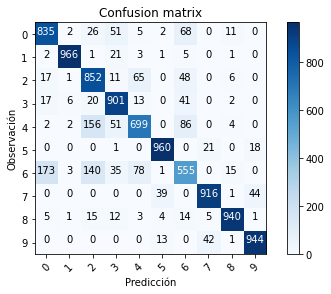




CASO  2
---------------------------------


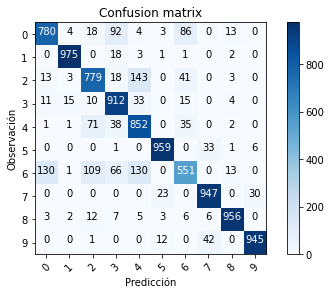




CASO  3
---------------------------------


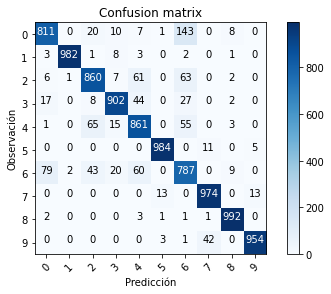

In [56]:
for caso in range(casos):
  print("CASO ",caso + 1)
  print("---------------------------------")
  Y_pred = models[caso].predict(test_images)
  Y_pred_classes = np.argmax(Y_pred, axis = 1) 
  Y_true = np.argmax(test_labels, axis = 1) 
  confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
  plot_confusion_matrix(confusion_mtx, classes = range(10))
  plt.show()
  print("\n\n")


**Modelo 1**

Como vemos, la mayoría de las imágenes las predice correctamente, de ahí que los **valores más altos** los obtengamos en la **diagonal**. 

Si nos fijamos, de 1000 casos, 555 veces predice bien la imagen 6, pero 173 la confunde con la imagen que corresponde a la etiqueta 0. Esto es, confunde camisas (6) con camisetas (0), lo cuál es lógico y entendible. También, de 1000, 78 las confunde con abrigos (4), 140 con jerseys (2) y 35 con vestidos (3)

**Modelo 2**

Vemos que mantiene los valores más altos en la diagonal, es decir, predice correctamente la mayoría de las veces.

También confunce camisas con camisetas, jerseys y abrigos, de 1000, confunde 143 veces jerseys (2) con abrigos (4).


**Modelo 3**

Podemos ver que sigue la misma línea que los modelos anteriores, confundiendo camisas, camisetas, jerseys y abrigos

Algo destacable de este modelo es, que excepto en las predicciones de la imagen 6, las demás predicciones las acierta con valores muy altos, cercanos a 1000. 
En cambio, los otros dos modelos, a pesar de tener los valores más altos en la diagonal, eran menores que estos del modelo 3.

Esta precisión tan alta se debe al optimizador que usa éste, que como ya hemos visto antes, se trata del optimizador *adam*


## **Conclusiones**

Nos damos cuenta que usando el optimizador **Adam** mejora notablemente los resultados en cuanto a precisión y pérdida de nuestros modelos. Se debe a que combina varias ventajas de dos optimizadores que, por separado, ya dan buenos resultados. También, para este caso es bueno utilizar batchnormalization para mejorar el modelo.

En cuanto a diferencias entre usar redes neuronales y redes de neuronas convolucionales, si comparamos un modelo de redes neuronales que usaba optimizador sgd y función de activación relu (modelo 5- práctica 1) con otro modelo de redes convolucionales con las mismas características (modelo 1), vemos que obtenemos unos resultados muy parecidos, no vemos grandes mejoras a pesar de usar más capas.

Por otro lado, comprobamos que aun modificando algunos hiperparámetros, no hay gran diferencia en cuanto a los valores de pérdida y de precisión.




